In [1]:
from pathlib import Path
from eda import data_basics
from nested_cv import rnCV
from ml_viz import plot_algorithm_performance_summary, plot_single_model_metrics_summary
DATASET_PATH = Path("../data/breast_cancer.csv")

## Importing-checking data and running the nested-cv pipeline

In [2]:
cancer_data, _ = data_basics(DATASET_PATH)

DATASET ANALYSIS OF: breast_cancer.csv

📊 DATASET DIMENSIONS: 512 rows x 31 columns

📋 COLUMN DATA TYPES:

🏷️ diagnosis is the only categorical column (type: object)
📊 All the other 30 numerical columns are of type: float64

🔍 DUPLICATE SAMPLES: 0

⚖️ DIAGNOSIS CLASS DISTRIBUTION:
  - B: 321 samples (62.7%)
  - M: 191 samples (37.3%)

❓ MISSING VALUES:
radius_mean                 7
texture_mean                5
perimeter_mean              5
area_mean                   4
smoothness_mean             6
compactness_mean            1
concavity_mean             10
concave points_mean         8
symmetry_mean               5
fractal_dimension_mean      3
radius_se                   2
texture_se                  7
perimeter_se                1
area_se                     3
smoothness_se               6
compactness_se              4
concavity_se                2
concave points_se           4
symmetry_se                 5
fractal_dimension_se        5
radius_worst                5
texture_worst  

In [3]:
cancer_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,...,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.29140,0.16090,0.3029,0.08216
1,B,11.50,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,0.1834,...,12.97,22.46,83.12,508.9,0.1183,0.1049,0.08105,0.06544,0.2740,NaN
2,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.23220,0.11190,0.2809,0.06287
3,M,18.82,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.08744,0.1943,...,22.66,30.93,145.30,1603.0,0.1390,0.3463,0.39120,0.17080,0.3007,0.08314
4,B,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,...,13.74,19.93,88.81,585.4,0.1483,NaN,0.22410,0.10560,0.3380,0.09584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,B,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,...,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291
508,B,14.20,20.53,92.41,NaN,0.08931,0.11080,0.05063,NaN,0.1506,...,16.45,27.26,112.10,828.5,0.1153,0.3429,0.25120,0.13390,0.2534,0.07858
509,M,13.86,16.93,90.96,578.9,0.10260,0.15170,NaN,0.05602,0.2106,...,15.75,26.93,104.40,750.1,0.1460,0.4370,0.46360,0.16540,0.3630,0.10590
510,M,17.30,17.08,113.00,928.2,0.10080,0.10410,0.12660,0.08353,0.1813,...,19.85,25.09,130.90,1222.0,0.1416,0.2405,0.33780,0.18570,0.3138,0.08113


In [ ]:
# Run the nested cross-validation piepeline and get the results
rncv = rnCV(
    dataset=cancer_data,
    estimators=["LR", "GNB", "SVM", "RF", "LGB"],
    target_column='diagnosis',
    positive_class_label='M',
    R=2, N=5, K=3,
    random_seed=33
)
rncv.run_nested_cv(n_trials=20, inner_metric='roc_auc', custom_hp_params=None)
results_df = rncv.get_results_df()
comparison_df = rncv.compare_algorithms(primary_metric='MCC', sort_ascending=False)

Encoding target 'diagnosis': M=1, B=0
Starting Repeated Nested Cross-Validation (R=2, N=5, K=3)
Inner loop optimization metric: roc_auc
Hyperparameter tuning trials per inner loop: 20
------------------------------------------------------------
Processing: Repeat 1/2, in Outer Fold 1/5 from 10 total folds
Outer trainig set shape: (409, 30), Outer test set shape: (103, 30)
Initializing ATOMClassifier for HP tuning ...
Running ATOM for models ['LR', 'GNB'] ...
Running inner loop with 3 folds for hyperparameter tuning ...
Fitting Imputer...
Imputing missing values...
Fitting Scaler...
Scaling features...
Evaluating tuned models on (processed) outer test set...
Evaluating LR...
Evaluating model 0: LR...
Converting predictions DataFrame to numpy array, shape: (103,)
Converting DataFrame to numpy array, shape: (103, 2)
Evaluating GNB...
Evaluating model 1: GNB...
Converting predictions DataFrame to numpy array, shape: (103,)
Converting DataFrame to numpy array, shape: (103, 2)

Processing: R

## Plotting the confusion matrices to compare model performance accross the 2 classes

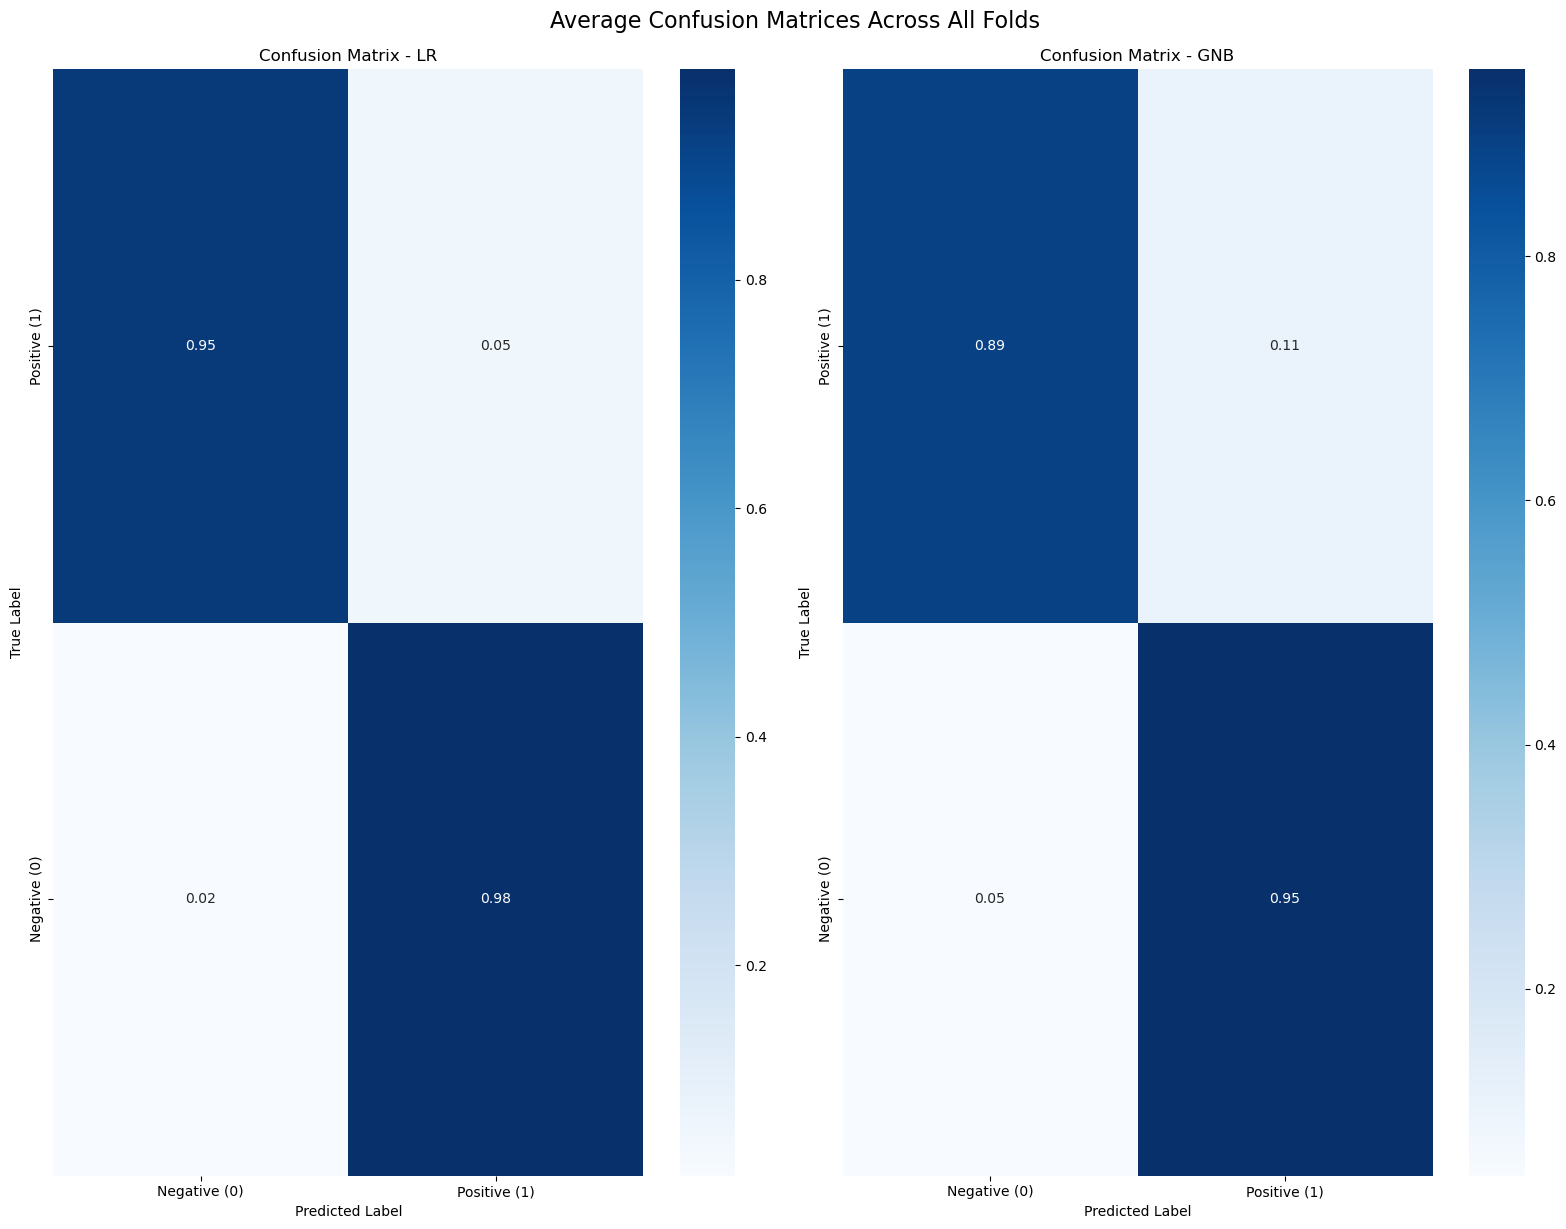

{'LR': array([[36.1,  2.1],
        [ 1. , 63.2]]),
 'GNB': array([[34.1,  4.1],
        [ 3. , 61.2]])}

In [7]:
rncv.plot_confusion_matrices()

## Using as the primary metric for model selection the median of matthews correlation coefficient (MCC) 

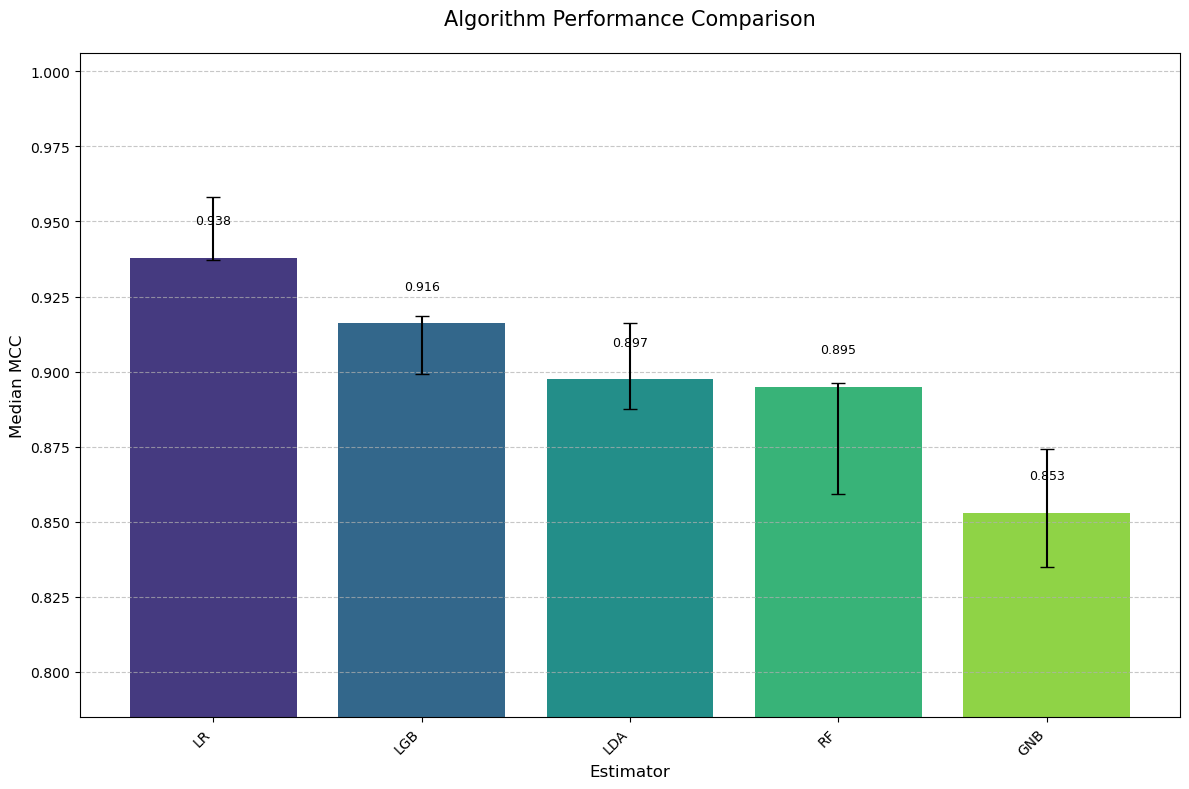

In [18]:
plot_algorithm_performance_summary(comparison_df, primary_metric='MCC', title="Algorithm Performance Comparison")

## Assessing performance of the winner LR model with all available metrics

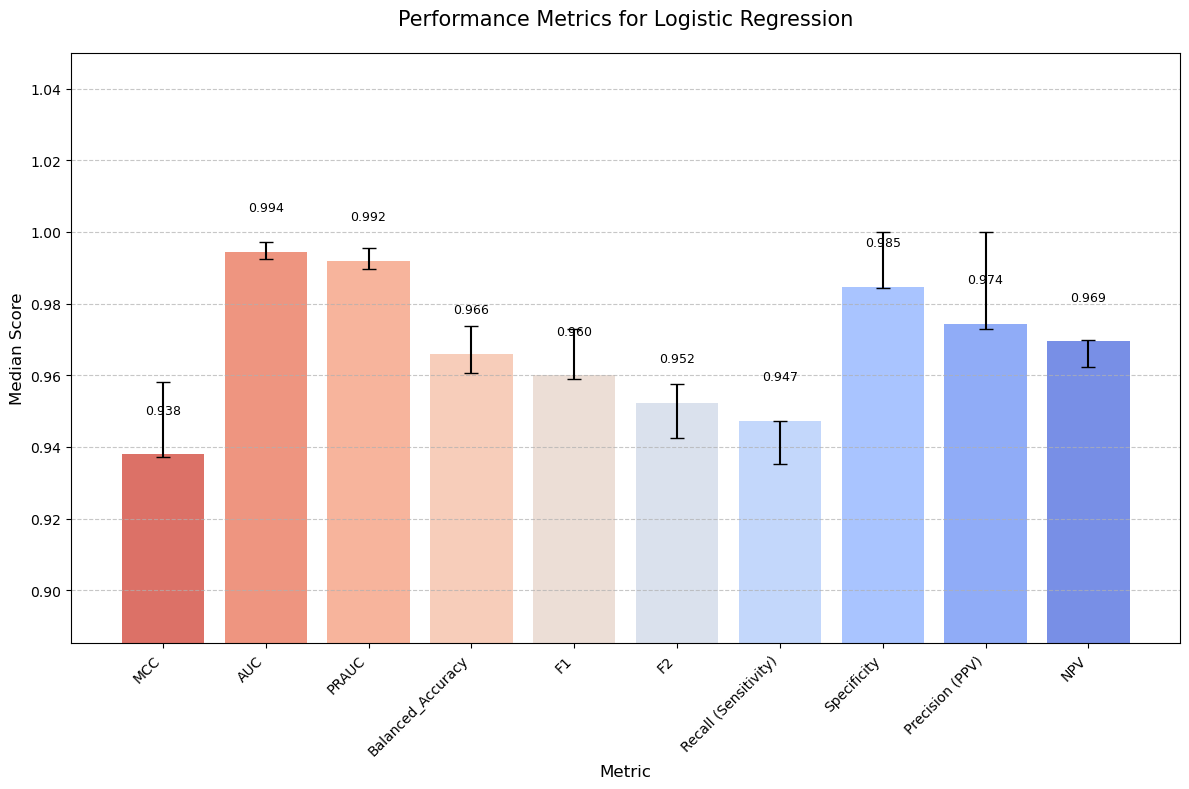

In [15]:
plot_single_model_metrics_summary(
    comparison_df,
    estimator_name='LR',
    metric_names=['MCC', 'AUC', 'PRAUC', 'Balanced_Accuracy', 'F1', 'F2', 'Recall (Sensitivity)', 'Specificity', 'Precision (PPV)', 'NPV'],
    title="Performance Metrics for Logistic Regression",
    figsize=(12, 8)
)

## Training the final model

In [6]:
winner = rnCV(dataset= cancer_data, estimators=["LR"], K=5)

winner_path = winner.train_final_model(winner_model_name="LR")

Encoding target 'diagnosis': M=1, B=0
Training final model 'LR' on the entire dataset...
Initializing ATOMClassifier for final model training ...
Running ATOM for model LR ...
Running inner loop with 5 folds for hyperparameter tuning ...
Fitting Imputer...
Imputing missing values...
Fitting Scaler...
Scaling features...
Final model saved to: ../models/winner.pkl


## Use the next cell with your data to use for inference with the winner model

In [13]:
# MYDAT = Path("../data/...")

# my_dat, _ = data_basics(MYDAT)

# my_dat

In [12]:
#winner.predict_unseen(my_dat, "../models/winner.pkl")